#### Plotting Gini Index for some values of f and the Lorenz Curve

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
%matplotlib inline
plt.style.use('default')

/home/lautaro/anaconda3/envs/abm/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


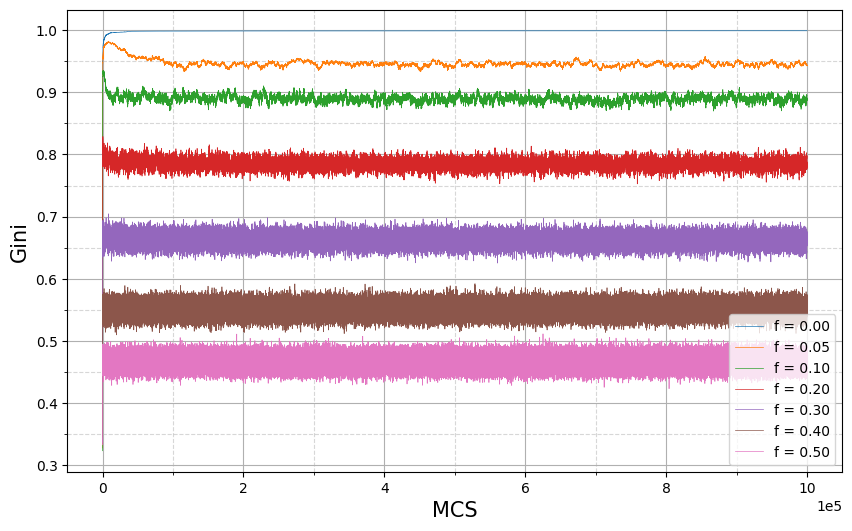

/tmp/ipykernel_9142/2770839821.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(os.path.join(figpath, 'ginis'), format='png')


In [3]:
# Gini
filepath = os.path.join(os.getcwd())
figpath = os.path.join(filepath, 'figs')

f_set = [0, .05, .1, .2, .3, .4, .5]

fig, ax = plt.subplots(figsize=(10, 6))
# Use this if the data is stored every 10 MCS
#t = np.arange(0, 1+1e+5, 10)

ax.set_xlabel('MCS', size=15)
ax.set_ylabel('Gini', size=15)
ax.set_xticks(np.arange(0, 1000000, 100000), minor=True)
ax.set_yticks(np.arange(0, 1.05, .05), minor=True)

for f in f_set:
    path_gini = os.path.join(filepath, 'f={:.2f}_gini.npy'.format(f))
    gini = np.load(path_gini)
    ax.plot(gini, label='f = {:.2f}'.format(f), linewidth=.5)
    ax.ticklabel_format(axis='x', style='scientific', scilimits=(5,5))
    ax.legend()
    ax.grid(which='minor', alpha=.5, linestyle='--')
    ax.grid(which='major', alpha=1, linestyle='-')

plt.show()

fig.savefig(os.path.join(figpath, 'ginis'), format='png')


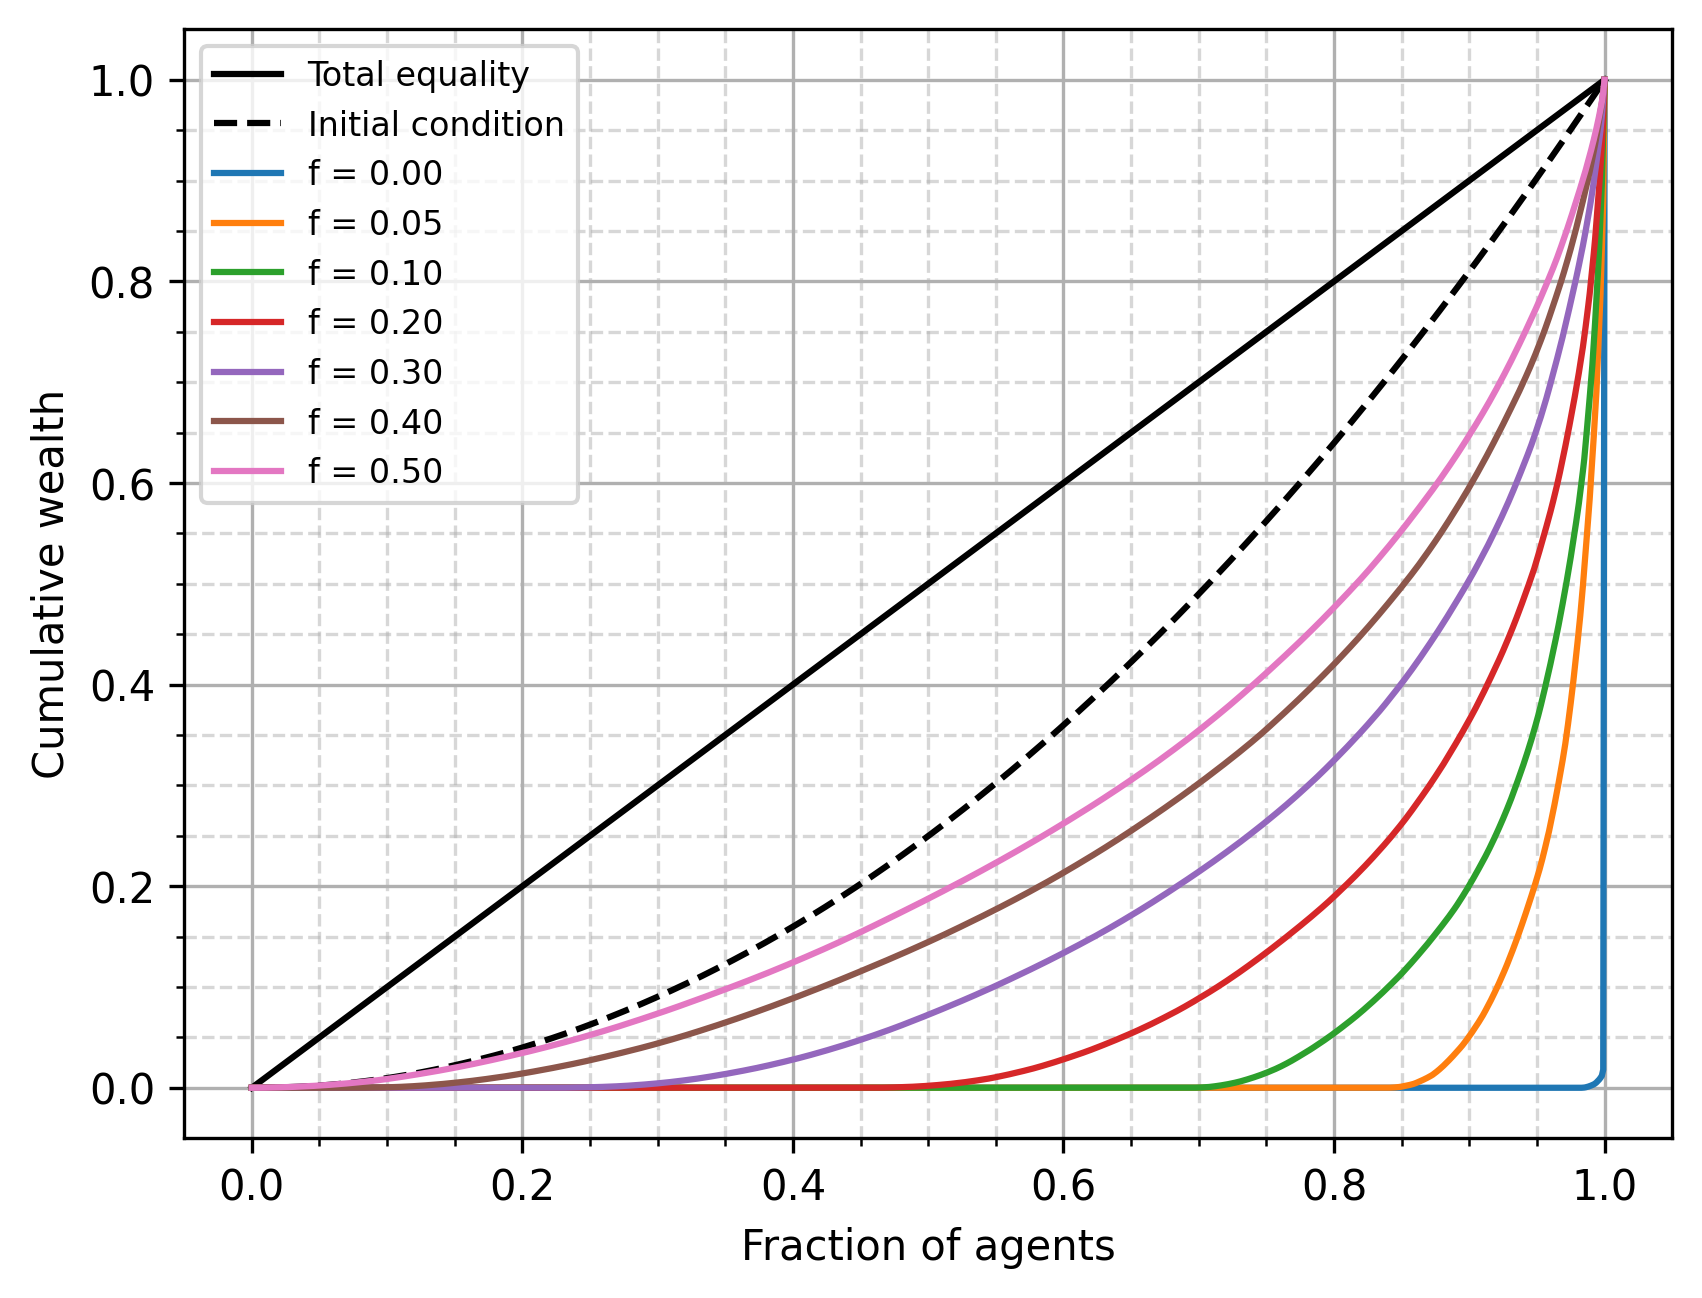

In [33]:
# Lorenz Curve
f_set = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

fig, ax = plt.subplots(dpi=300)

ax.set_ylabel("Cumulative wealth")
ax.set_xlabel("Fraction of agents")
ax.set_xticks(np.arange(0, 1.05, 0.05), minor=True)
ax.set_yticks(np.arange(0, 1.05, 0.05), minor=True)

# Plot gini=0 curve
ax.plot([0, 1], [0, 1], color="k", label="Total equality")
# Plot uniform distribution curve
agent = np.random.rand(10000)
# Normalize wealth
agent /= np.sum(agent)
agent = np.sort(agent)
ax.plot(
    np.linspace(0, 1, agent.shape[0]),
    np.cumsum(agent) / np.sum(agent),
    label="Initial condition".format(f), color="black",
    linestyle="--",
)

for f in f_set:
    path_agents = os.path.join(filepath, "f={:.2f}_agents.npy".format(f))
    agent = np.load(path_agents)
    agent = np.sort(agent)

    ax.plot(
        np.linspace(0, 1, agent.shape[0]),
        np.cumsum(agent) / np.sum(agent),
        label="f = {:.2f}".format(f),
    )
    ax.grid(which="minor", alpha=0.5, linestyle="--")
    ax.grid(which="major", alpha=1, linestyle="-")

    path_agents = os.path.join(filepath, "f={:.2f}_agents.npy".format(f))

ax.legend(fontsize=8)

plt.show()

fig.savefig(os.path.join(figpath, "lorenz_curve"), format="png")

/home/lautaro/anaconda3/envs/abm/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


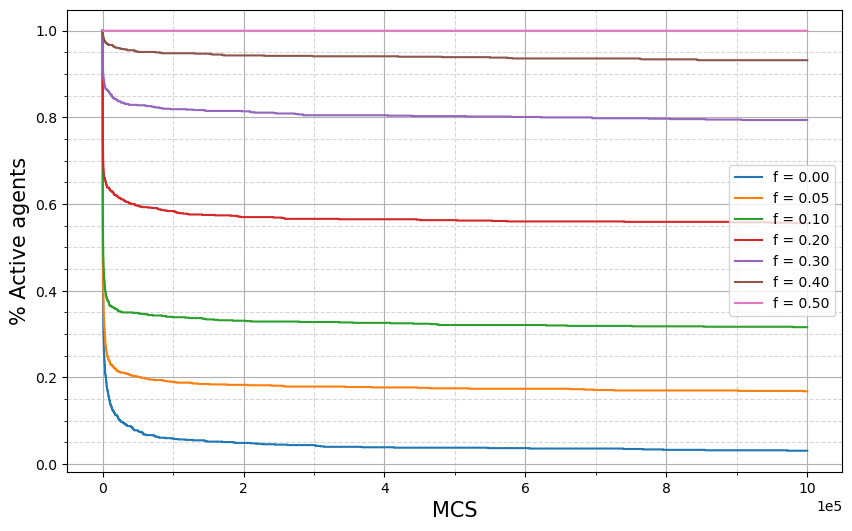

NameError: name 'figpath' is not defined

In [3]:
# Number of active agents

filepath = os.path.join(os.getcwd(), "data/1_basic_results")

f_set = [0, .05, .1, .2, .3, .4, .5]
n_agents = int(1e+3)


fig, ax = plt.subplots(figsize=(10, 6))
# This is because the data is stored every 10 MCS
#t = np.arange(0, 1+1e+5, 10)

ax.set_xlabel('MCS', size=15)
ax.set_ylabel('% Active agents', size=15)
ax.set_xticks(np.arange(0, 1000000, 100000), minor=True)
ax.set_yticks(np.arange(0, 1.05, .05), minor=True)

for f in f_set:
    path_active = os.path.join(filepath, 'f={:.2f}_active.npy'.format(f))
    active = np.load(path_active)
    ax.plot(active/n_agents, label='f = {:.2f}'.format(f))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(5,5))
    ax.legend()
    ax.grid(which='minor', alpha=.5, linestyle='--')
    ax.grid(which='major', alpha=1, linestyle='-')

plt.show()

fig.savefig(os.path.join(figpath, 'active_agents'), format='png')